In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# FBI Gun Data
The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. 

The data I will be using for analysis will be month, state, handgun, long gun, and other. The columns I chose will provide information on the state and national level over the years. I want to find the top ten states with the most guns and how they compare with one another and nationally. I want to analyze the most recent year to come up with recent trends on a state and national level.  

# Data Exploration

In [3]:
#importing the gun_data.xlsx
df_gun = pd.read_excel('/project_data/data_asset/gun_data.xlsx')
df_gun.head(55)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


In [4]:
#checking the shape of the data
df_gun.shape

(12485, 27)

In [5]:
#checking the data types and the null value counts.
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [6]:
#checking if any rows are duplicates
df_gun.duplicated().sum()

0

In [7]:
#checking all th column names to see if formatting is common
df_gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [8]:
#checking the value count of each month
df_gun['month'].value_counts()

2003-07    55
2002-08    55
2016-03    55
2012-10    55
2013-03    55
           ..
2001-10    55
2009-01    55
1999-04    55
2000-08    55
2002-07    55
Name: month, Length: 227, dtype: int64

In [9]:
#checking to see if month is in order and no month is skipped
month_list = []
for m in df_gun.month:
    if m not in month_list:
        month_list.append(m)
print(month_list)

['2017-09', '2017-08', '2017-07', '2017-06', '2017-05', '2017-04', '2017-03', '2017-02', '2017-01', '2016-12', '2016-11', '2016-10', '2016-09', '2016-08', '2016-07', '2016-06', '2016-05', '2016-04', '2016-03', '2016-02', '2016-01', '2015-12', '2015-11', '2015-10', '2015-09', '2015-08', '2015-07', '2015-06', '2015-05', '2015-04', '2015-03', '2015-02', '2015-01', '2014-12', '2014-11', '2014-10', '2014-09', '2014-08', '2014-07', '2014-06', '2014-05', '2014-04', '2014-03', '2014-02', '2014-01', '2013-12', '2013-11', '2013-10', '2013-09', '2013-08', '2013-07', '2013-06', '2013-05', '2013-04', '2013-03', '2013-02', '2013-01', '2012-12', '2012-11', '2012-10', '2012-09', '2012-08', '2012-07', '2012-06', '2012-05', '2012-04', '2012-03', '2012-02', '2012-01', '2011-12', '2011-11', '2011-10', '2011-09', '2011-08', '2011-07', '2011-06', '2011-05', '2011-04', '2011-03', '2011-02', '2011-01', '2010-12', '2010-11', '2010-10', '2010-09', '2010-08', '2010-07', '2010-06', '2010-05', '2010-04', '2010-03'

In [10]:
#checking if month_list length matches df_gun['month'].value_counts() length
len(month_list)

227

In [12]:
df_gun.tail(55)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12430,1998-11,Alabama,0.0,NaN,449.0,603.0,NaN,10,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1062
12431,1998-11,Alaska,4.0,NaN,71.0,68.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145
12432,1998-11,Arizona,0.0,NaN,169.0,200.0,NaN,10,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379
12433,1998-11,Arkansas,0.0,NaN,149.0,429.0,NaN,11,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,589
12434,1998-11,California,434.0,NaN,717.0,950.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2101
12435,1998-11,Colorado,0.0,NaN,181.0,416.0,NaN,25,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,622
12436,1998-11,Connecticut,17.0,NaN,19.0,35.0,NaN,0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80
12437,1998-11,Delaware,0.0,NaN,14.0,40.0,NaN,1,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
12438,1998-11,District of Columbia,0.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12439,1998-11,Florida,0.0,NaN,319.0,443.0,NaN,10,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812


In [10]:
# set all null values to 0
df_gun.fillna(0, inplace=True)

In [11]:
#add another column called total_guns to sub total the handgun, longgun, and other columns
df_gun['total_guns'] = df_gun.handgun + df_gun.long_gun + df_gun.other 

In [12]:
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_guns
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,12275.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,5469.0
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,19929.0
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,10575.0
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,64730.0


In [13]:
#using a test state to view data
df_PA = df_gun[df_gun['state'] == 'Pennsylvania']
df_PA

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_guns
40,2017-09,Pennsylvania,23144.0,0.0,39825.0,13222.0,48.0,0,179.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77003,53095.0
95,2017-08,Pennsylvania,24329.0,0.0,40628.0,13170.0,78.0,0,172.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79020,53876.0
150,2017-07,Pennsylvania,23669.0,0.0,37329.0,11694.0,159.0,0,188.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73654,49182.0
205,2017-06,Pennsylvania,22674.0,0.0,41408.0,11117.0,200.0,0,203.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76201,52725.0
260,2017-05,Pennsylvania,24962.0,0.0,42646.0,11123.0,157.0,0,242.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79725,53926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12250,1999-03,Pennsylvania,1120.0,0.0,0.0,48470.0,0.0,1910,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51500,48470.0
12305,1999-02,Pennsylvania,673.0,0.0,0.0,37810.0,0.0,934,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39417,37810.0
12360,1999-01,Pennsylvania,729.0,0.0,4.0,30257.0,0.0,1277,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32267,30261.0
12415,1998-12,Pennsylvania,978.0,0.0,13.0,45262.0,0.0,2047,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48300,45275.0


In [14]:
#using a test state to view data
df_TX = df_gun[df_gun['state'] ==  'Alabama']
df_TX

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_guns
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,12275.0
55,2017-08,Alabama,19733.0,4.0,6289.0,6045.0,216.0,311,0.0,10.0,...,0.0,0.0,14.0,11.0,2.0,0.0,0.0,0.0,35038,12550.0
110,2017-07,Alabama,18042.0,1.0,6046.0,4790.0,224.0,258,0.0,7.0,...,0.0,0.0,12.0,8.0,0.0,0.0,0.0,0.0,31474,11060.0
165,2017-06,Alabama,19508.0,89.0,8275.0,4782.0,254.0,334,0.0,11.0,...,0.0,0.0,16.0,9.0,0.0,1.0,1.0,1.0,35687,13311.0
220,2017-05,Alabama,18538.0,313.0,7198.0,4559.0,254.0,309,0.0,5.0,...,0.0,0.0,12.0,11.0,1.0,0.0,1.0,1.0,33331,12011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12210,1999-03,Alabama,0.0,0.0,9151.0,9991.0,0.0,282,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19424,19142.0
12265,1999-02,Alabama,0.0,0.0,9630.0,10654.0,0.0,299,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20583,20284.0
12320,1999-01,Alabama,0.0,0.0,7516.0,10311.0,0.0,222,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18049,17827.0
12375,1998-12,Alabama,0.0,0.0,10118.0,25120.0,0.0,268,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35506,35238.0


# Find the top 10 States with most number of guns
What are the top ten 10 states with, by average, the most number of guns (handguns, longuns, other)? Save for later evaluations.

In [15]:
#Group the data by states add avg each category to find top and bottom 5
top_guns = df_gun.groupby(['state']).total_guns.mean().sort_values()[-10:]
top_guns

state
Alabama         21531.471366
Colorado        23413.806167
Missouri        24512.462555
Virginia        25595.352423
Tennessee       26429.515419
Ohio            33229.555066
Florida         43578.713656
Pennsylvania    50903.281938
California      53701.696035
Texas           63166.048458
Name: total_guns, dtype: float64

The Top 10 Most Gun Owning states are
1. Texas
2. California
3. Pennsylvania
4. Florda
5. Ohio
6. Tennessee
7. Virginia
8. Missouri
9. Colorado
10. Alabama


In [16]:
#creating a list of the top ten
top_ten = []
for state in top_guns.index:
    top_ten.append(state)

In [17]:
top_ten

['Alabama',
 'Colorado',
 'Missouri',
 'Virginia',
 'Tennessee',
 'Ohio',
 'Florida',
 'Pennsylvania',
 'California',
 'Texas']

In [18]:
df_gun

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_guns
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,12275.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,5469.0
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,19929.0
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,10575.0
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,64730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,0.0,14.0,2.0,0.0,8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,16.0
12481,1998-11,Washington,1.0,0.0,65.0,286.0,0.0,8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361,351.0
12482,1998-11,West Virginia,3.0,0.0,149.0,251.0,0.0,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408,400.0
12483,1998-11,Wisconsin,0.0,0.0,25.0,214.0,0.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241,239.0


In [19]:
#add year column to seperate month and year
df_gun.insert(1, 'year', df_gun.month)

In [20]:
df_gun

,month,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_guns
0,2017-09,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,12275.0
1,2017-09,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,5469.0
2,2017-09,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,19929.0
3,2017-09,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,10575.0
4,2017-09,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,64730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,1998-11,Virginia,0.0,0.0,14.0,2.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,16.0
12481,1998-11,1998-11,Washington,1.0,0.0,65.0,286.0,0.0,8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361,351.0
12482,1998-11,1998-11,West Virginia,3.0,0.0,149.0,251.0,0.0,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408,400.0
12483,1998-11,1998-11,Wisconsin,0.0,0.0,25.0,214.0,0.0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241,239.0


In [21]:
#split month and year by '-'
df_gun.month = df_gun.month.apply(lambda x: x.split("-")[1])
df_gun.year = df_gun.year.apply(lambda x: x.split("-")[0])


In [22]:
df_gun

,month,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_guns
0,09,2017,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,12275.0
1,09,2017,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,5469.0
2,09,2017,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,19929.0
3,09,2017,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,10575.0
4,09,2017,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,64730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,11,1998,Virginia,0.0,0.0,14.0,2.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,16.0
12481,11,1998,Washington,1.0,0.0,65.0,286.0,0.0,8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361,351.0
12482,11,1998,West Virginia,3.0,0.0,149.0,251.0,0.0,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408,400.0
12483,11,1998,Wisconsin,0.0,0.0,25.0,214.0,0.0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241,239.0


Data Cleaning/Changes made to data

1. Set all NAN values to 0. With gun laws changing rapidly from state to state over the years, NAN appears to be data never recorded because it wasn't required by law.
2. Added column called total_guns which values is the sum of handguns, long guns, and other. This column will be another variable for comparing on the state and national level. Ultimately determating the top ten states with the most guns.
3. Created a new column called year by seperating month and year in month. Will use year as the measure of time to halp study the trends over the years.
4. Created a top ten list for future reference

# Over 20 years, how do the average amount of Handguns, Long guns, other, and total guns compare?

Comparing Handguns, Longguns, other, and total using bar graphs and line graphs

Group by Year

In [23]:
#create new data frame by grouping master data frame by year by mean.
df_year = df_gun.groupby('year').mean()

In [24]:
df_year

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_guns
year,,,,,,,,,,,,,,,,,,,,,
1998,710.627273,0.000000,1999.990909,5298.100000,0.000000,79.272727,20.172727,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8108.163636,7298.090909
1999,1572.272727,0.000000,3843.542424,7905.228788,0.000000,157.186364,224.416667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13702.646970,11748.771212
2000,1860.324242,0.000000,3321.028788,7242.390909,0.000000,145.116667,199.466667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12768.327273,10563.419697
2001,2133.845455,0.000000,3283.656061,7489.962121,0.000000,147.169697,151.706061,1.930303,4.948485,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13363.704545,10773.618182
2002,2065.471212,0.000000,2795.624242,6680.774242,0.000000,141.013636,116.327273,7.700000,16.787879,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12677.377273,9476.398485
2003,2126.509091,0.000000,2804.663636,6640.995455,0.000000,150.357576,105.978788,7.796970,13.115152,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12730.672727,9445.659091
2004,2038.896970,0.000000,3015.848485,6828.556061,0.000000,154.522727,78.119697,5.974242,9.786364,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12999.834848,9844.404545
2005,2045.746970,0.000000,3396.575758,6946.154545,0.000000,166.287879,19.936364,4.774242,8.760606,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13434.931818,10342.730303
2006,3087.050000,0.000000,3698.977273,7256.956061,0.000000,197.146970,63.321212,4.766667,8.965152,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15140.995455,10955.933333


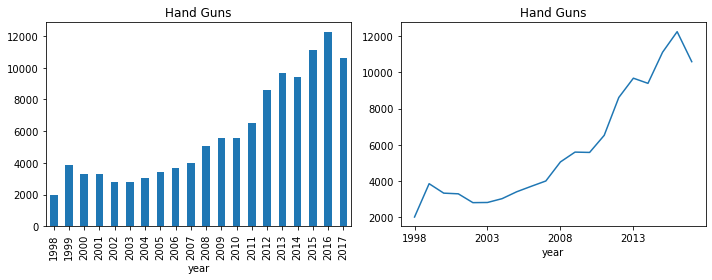

In [25]:
#graphing handgun average amounts by year.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
df_year.handgun.plot(kind='bar', ax=ax1, title='Hand Guns')
df_year.handgun.plot(kind='line', ax=ax2, title='Hand Guns')


plt.tight_layout()  

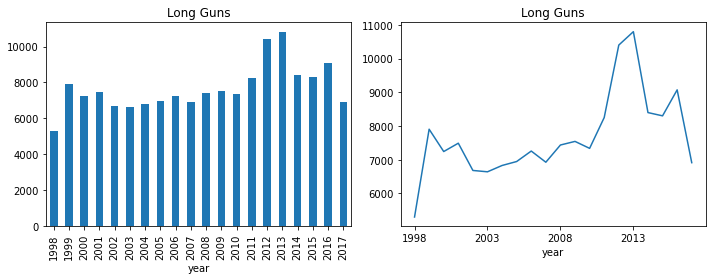

In [26]:
#graphing long gun average amounts by year.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
df_year.long_gun.plot(kind='bar', ax=ax1, title='Long Guns')
df_year.long_gun.plot(kind='line', ax=ax2, title='Long Guns')


plt.tight_layout()  

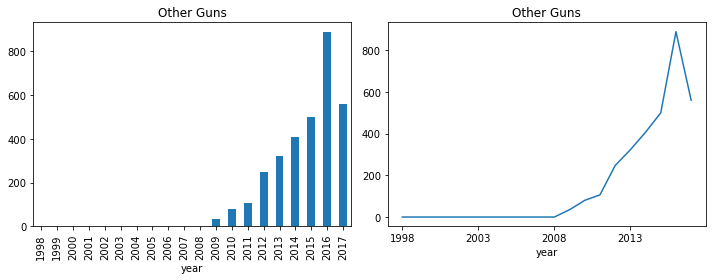

In [27]:
#graphing other gun average amounts by year.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
df_year.other.plot(kind='bar', ax=ax1, title='Other Guns')
df_year.other.plot(kind='line', ax=ax2, title='Other Guns')


plt.tight_layout()  

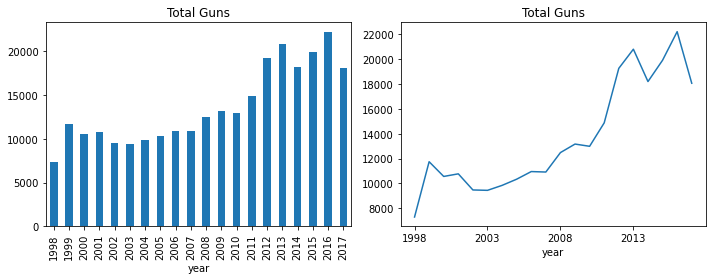

In [28]:
#graphing total gun average amounts by year.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
df_year.total_guns.plot(kind='bar', ax=ax1, title='Total Guns')
df_year.total_guns.plot(kind='line', ax=ax2, title='Total Guns')


plt.tight_layout()  

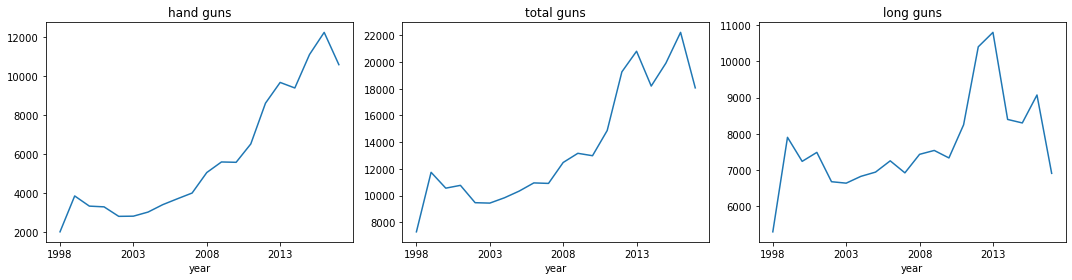

In [29]:
#comparing hand guns, total guns, and long guns
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,4))  # 1 row, 2 columns
df_year.handgun.plot(kind='line', ax=ax1, title='hand guns')
df_year.total_guns.plot(kind='line', ax=ax2, title='total guns')
df_year.long_gun.plot(kind='line', ax=ax3, title='long guns')



plt.tight_layout()  

# Observations
    1. The average amount of handguns over the years increased. Reaching its max in 2016 with 12250.754545 amount of handguns on average
    2. The average amount of long guns remained steady from 1999 to 2011. Then we saw a spike in numbers in 2012-2013 before dropping down.
    3. The average amount of total guns increased over the years with the increase of handgun numbers rapidly leading to the overall increase.
    4. The average handgun and average total gun charts are nearly identical in shape
    5. Long guns lead handguns in average amount until 2014.

# Over 20 years, How do the top ten states compare and contrast with the national amount and each other?
Group by State and Year

Compare numbers and visuals of the top 10 states with, on average, the most guns.

In [30]:
#created new data frame from master data by grouping by state and year.
df_state_year = df_gun.groupby(['state','year']).mean()

In [31]:
df_state_year

permit  permit_recheck      handgun      long_gun  \
state   year                                                          
Alabama 1998    0.000000        0.000000  5283.500000  12861.500000   
        1999    0.000000        0.000000  7878.666667  12418.083333   
        2000    1.000000        0.000000  6831.916667  11397.250000   
        2001    0.000000        0.000000  6990.416667  11242.833333   
        2002    0.000000        0.000000  5441.166667   9278.250000   
...                  ...             ...          ...           ...   
Wyoming 2013  583.416667        0.000000  2224.333333   2481.166667   
        2014  587.166667        0.000000  1804.583333   2264.083333   
        2015  556.166667        0.000000  1864.500000   2188.666667   
        2016  661.500000        3.750000  1880.750000   2151.250000   
        2017  383.000000       18.555556  1545.111111   1680.222222   

                   other    multiple     admin  prepawn_handgun  \
state   year                                                      
Alabama 1998    0.000000  139.000000  0.000000         0.000000   
        1999    0.000000  266.250000  0.000000         0.000000   
        2000    0.000000  262.416667  0.000000         0.000000   
        2001    0.000000  290.833333  0.000000        12.000000   
        2002    0.000000  295.666667  0.000000        55.500000   
...                  ...         ...       ...              ...   
Wyoming 2013   75.250000  117.083333  1.916667         1.583333   
        2014   73.250000  104.083333  1.416667         1.416667   
        2015   93.583333  106.583333  0.750000         1.583333   
        2016  121.416667  107.916667  3.000000         0.916667   
        2017   98.555556   92.333333  4.555556         1.333333   

              prepawn_long_gun  prepawn_other  ...  rentals_handgun  \
state   year                                   ...                    
Alabama 1998          0.000000       0.000000  ...              0.0   
        1999          0.000000       0.000000  ...              0.0   
        2000          0.000000       0.000000  ...              0.0   
        2001         18.666667       0.000000  ...              0.0   
        2002         87.333333       0.000000  ...              0.0   
...                        ...            ...  ...              ...   
Wyoming 2013          2.500000       0.000000  ...              0.0   
        2014          1.916667       0.083333  ...              0.0   
        2015          2.833333       0.083333  ...              0.0   
        2016          3.416667       0.083333  ...              0.0   
        2017          2.333333       0.222222  ...              0.0   

              rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
state   year                                                                  
Alabama 1998               0.0              0.000000               0.000000   
        1999               0.0              0.000000               0.000000   
        2000               0.0              0.000000               0.000000   
        2001               0.0              0.000000               0.000000   
        2002               0.0              0.000000               0.000000   
...                        ...                   ...                    ...   
Wyoming 2013               0.0              0.083333               0.000000   
        2014               0.0              0.000000               0.000000   
        2015               0.0              0.666667               1.333333   
        2016               0.0              0.750000               1.750000   
        2017               0.0              5.000000               4.333333   

              private_sale_other  return_to_seller_handgun  \
state   year                                                 
Alabama 1998            0.000000                  0.000000   
        1999            0.000000                  0.000000   
        2000          

In [32]:
for state in df_state_year.index:
    if state[0] in top_ten:
        print(state[0])

Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
California
California
California
California
California
California
California
California
California
California
California
California
California
California
California
California
California
California
California
California
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Colorado
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Florida
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Missouri
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio
Ohio


In [33]:
#top ten states
top_ten

['Alabama',
 'Colorado',
 'Missouri',
 'Virginia',
 'Tennessee',
 'Ohio',
 'Florida',
 'Pennsylvania',
 'California',
 'Texas']

![](AL.jpg)

![](AL.jpg)

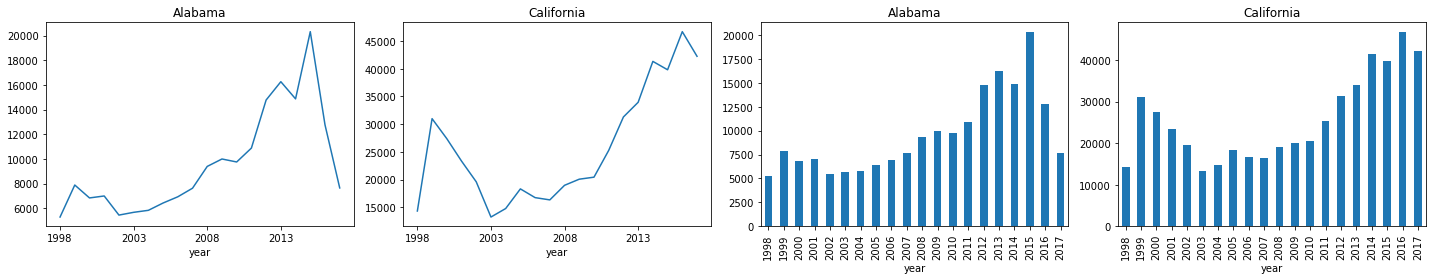

In [34]:
#Average amount of handguns in Alabama and California
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.handgun['Alabama'].plot(kind='line', ax=ax1, title='Alabama')
df_state_year.handgun['California'].plot(kind='line', ax=ax2, title='California')
df_state_year.handgun['Alabama'].plot(kind='bar', ax=ax3, title='Alabama')
df_state_year.handgun['California'].plot(kind='bar', ax=ax4, title='California')




plt.tight_layout()  

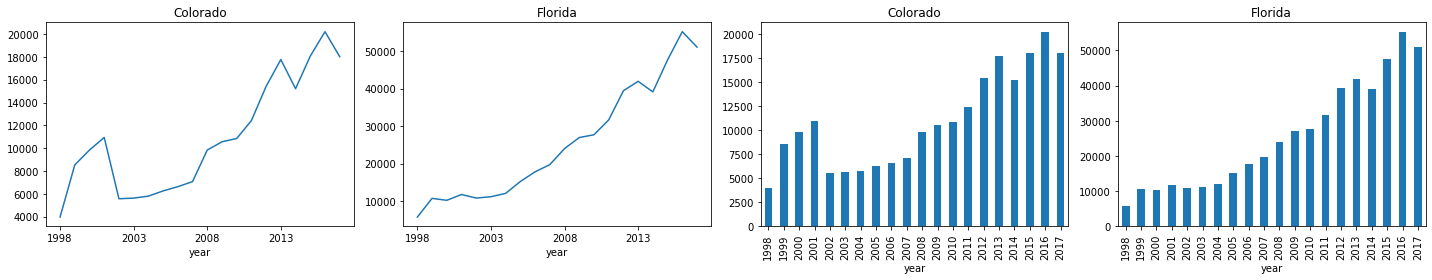

In [35]:
#Average amount of handguns in Colorado and Florida
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.handgun['Colorado'].plot(kind='line', ax=ax1, title='Colorado')
df_state_year.handgun['Florida'].plot(kind='line', ax=ax2, title='Florida')
df_state_year.handgun['Colorado'].plot(kind='bar', ax=ax3, title='Colorado')
df_state_year.handgun['Florida'].plot(kind='bar', ax=ax4, title='Florida')



plt.tight_layout()  

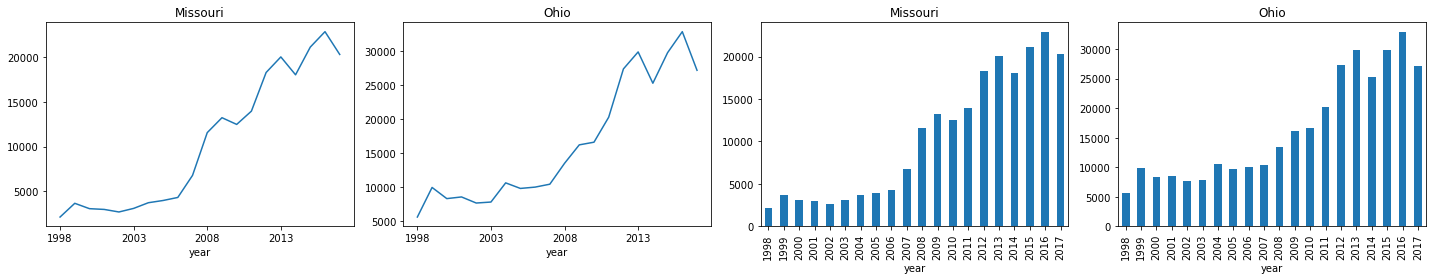

In [36]:
#Average amount of handguns in Missouri and Ohio
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.handgun['Missouri'].plot(kind='line', ax=ax1, title='Missouri')
df_state_year.handgun['Ohio'].plot(kind='line', ax=ax2, title='Ohio')
df_state_year.handgun['Missouri'].plot(kind='bar', ax=ax3, title='Missouri')
df_state_year.handgun['Ohio'].plot(kind='bar', ax=ax4, title='Ohio')



plt.tight_layout()  

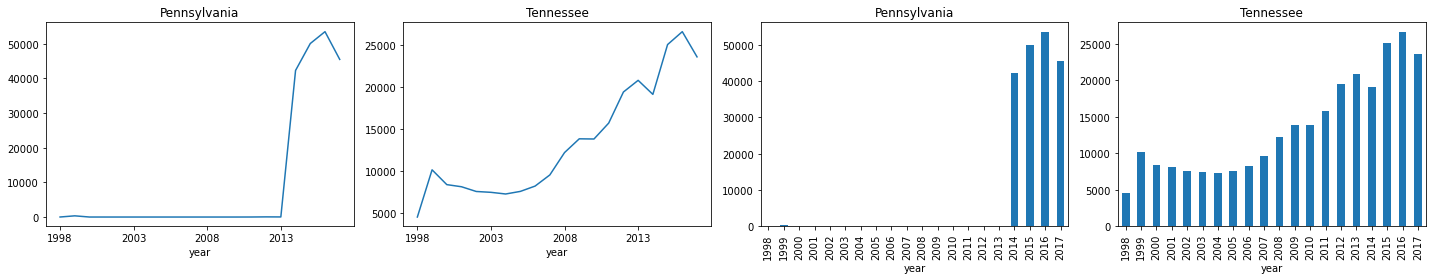

In [37]:
#Average amount of handguns in Pennsylvania and Tennessee
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.handgun['Pennsylvania'].plot(kind='line', ax=ax1, title='Pennsylvania')
df_state_year.handgun['Tennessee'].plot(kind='line', ax=ax2, title='Tennessee')
df_state_year.handgun['Pennsylvania'].plot(kind='bar', ax=ax3, title='Pennsylvania')
df_state_year.handgun['Tennessee'].plot(kind='bar', ax=ax4, title='Tennessee')



plt.tight_layout()  

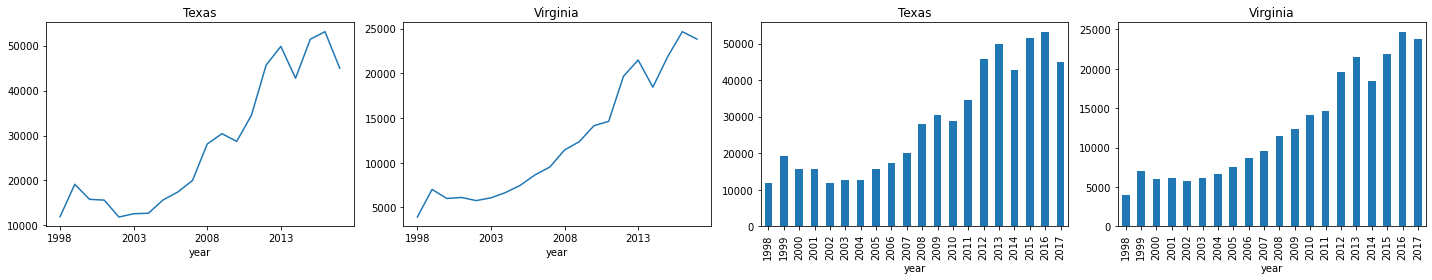

In [38]:
#Average amount of handguns in Texas and Virginia
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.handgun['Texas'].plot(kind='line', ax=ax1, title='Texas')
df_state_year.handgun['Virginia'].plot(kind='line', ax=ax2, title='Virginia')
df_state_year.handgun['Texas'].plot(kind='bar', ax=ax3, title='Texas')
df_state_year.handgun['Virginia'].plot(kind='bar', ax=ax4, title='Virginia')



plt.tight_layout()  

# Observation of top 10 states average hand guns amount per year
   1. Every state has a similar shaped bar and line graph except Pennsylvania. An increase from 1998 to 1999 before a slight decline then an increase in numbers reaching peak in either 2015 or 2016
   2. Alabama's highest average handgun amount was in 2015 and is trending downward in 2016.
   3. Pennsylvania numbers from 1999 to 2013 were very low before a dramatic increase in 2014. 
   4. Top 10 States and National average graph shapes are nearly identical

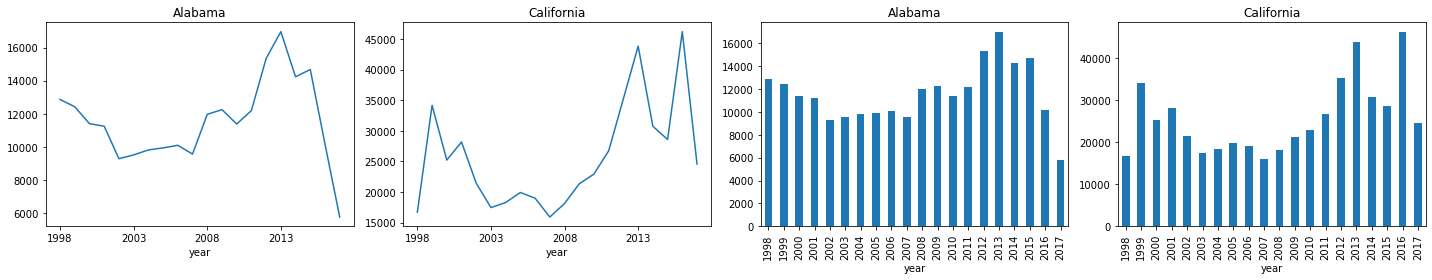

In [39]:
#Average amount of long guns in Alabama and California
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.long_gun['Alabama'].plot(kind='line', ax=ax1, title='Alabama')
df_state_year.long_gun['California'].plot(kind='line', ax=ax2, title='California')
df_state_year.long_gun['Alabama'].plot(kind='bar', ax=ax3, title='Alabama')
df_state_year.long_gun['California'].plot(kind='bar', ax=ax4, title='California')



plt.tight_layout()  

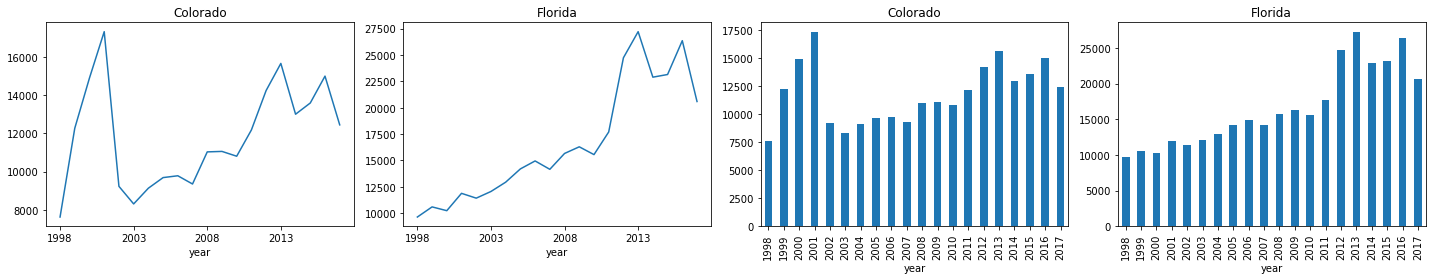

In [40]:
#Average amount of long guns in Colorado and Florida
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.long_gun['Colorado'].plot(kind='line', ax=ax1, title='Colorado')
df_state_year.long_gun['Florida'].plot(kind='line', ax=ax2, title='Florida')
df_state_year.long_gun['Colorado'].plot(kind='bar', ax=ax3, title='Colorado')
df_state_year.long_gun['Florida'].plot(kind='bar', ax=ax4, title='Florida')



plt.tight_layout()  

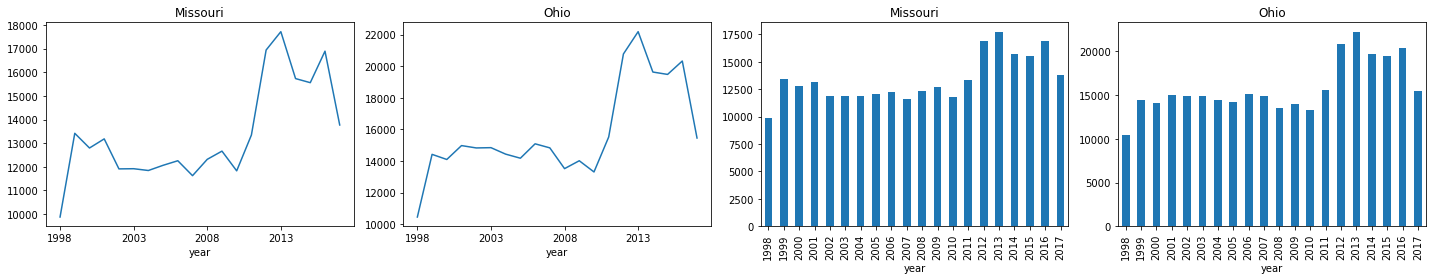

In [41]:
#Average amount of long guns in Missouri and Ohio
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.long_gun['Missouri'].plot(kind='line', ax=ax1, title='Missouri')
df_state_year.long_gun['Ohio'].plot(kind='line', ax=ax2, title='Ohio')
df_state_year.long_gun['Missouri'].plot(kind='bar', ax=ax3, title='Missouri')
df_state_year.long_gun['Ohio'].plot(kind='bar', ax=ax4, title='Ohio')




plt.tight_layout()  

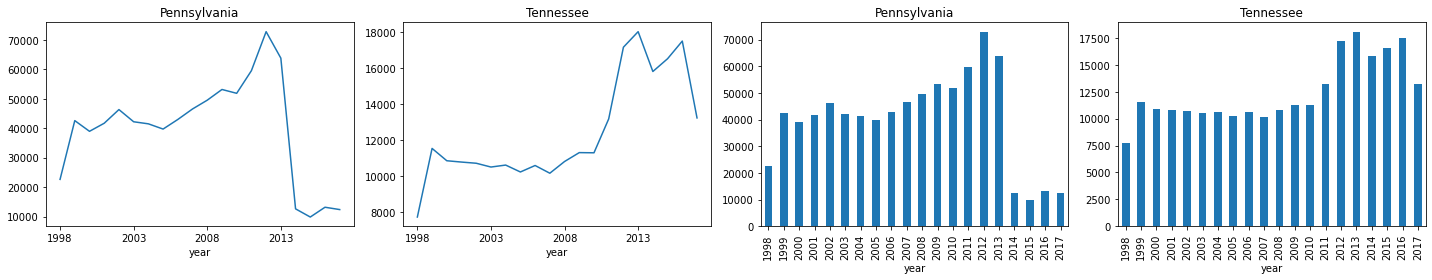

In [42]:
#Average amount of long guns in Pennsaylvania and Tennessee
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.long_gun['Pennsylvania'].plot(kind='line', ax=ax1, title='Pennsylvania')
df_state_year.long_gun['Tennessee'].plot(kind='line', ax=ax2, title='Tennessee')
df_state_year.long_gun['Pennsylvania'].plot(kind='bar', ax=ax3, title='Pennsylvania')
df_state_year.long_gun['Tennessee'].plot(kind='bar', ax=ax4, title='Tennessee')



plt.tight_layout()  

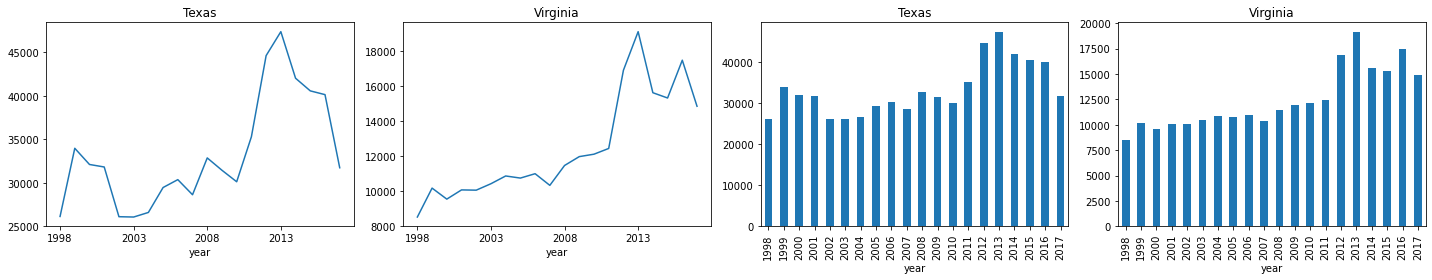

In [43]:
#Average amount of long guns in Texas and Virginia
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.long_gun['Texas'].plot(kind='line', ax=ax1, title='Texas')
df_state_year.long_gun['Virginia'].plot(kind='line', ax=ax2, title='Virginia')
df_state_year.long_gun['Texas'].plot(kind='bar', ax=ax3, title='Texas')
df_state_year.long_gun['Virginia'].plot(kind='bar', ax=ax4, title='Virginia')


plt.tight_layout()  

# Observation of top 10 states average long guns amount per year
    1. There isn't a common shape in the graphs for all the top ten states. 
    2. Missori, Ohio, Pennsylvania, Tennessee, and Texas have shapes that are similar to the national average
    3. Flordia and Virginia have similar shapes. With steady growth in long gun numbers over 20 years.
    4. Pennsylvania's long gun numbers decreased drastically when Pennsylvania's hand gun numbers increased drastically in 2014 to 2017
    5. Colorado reached it's max average long gun amount in 2001, while most other states reached their max in 2013

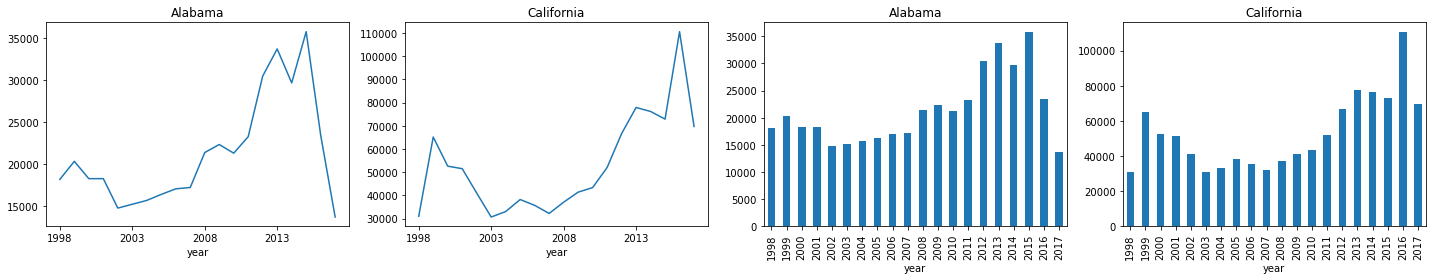

In [44]:
#Average amount of total guns in Alabama and California
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.total_guns['Alabama'].plot(kind='line', ax=ax1, title='Alabama')
df_state_year.total_guns['California'].plot(kind='line', ax=ax2, title='California')
df_state_year.total_guns['Alabama'].plot(kind='bar', ax=ax3, title='Alabama')
df_state_year.total_guns['California'].plot(kind='bar', ax=ax4, title='California')


plt.tight_layout()  

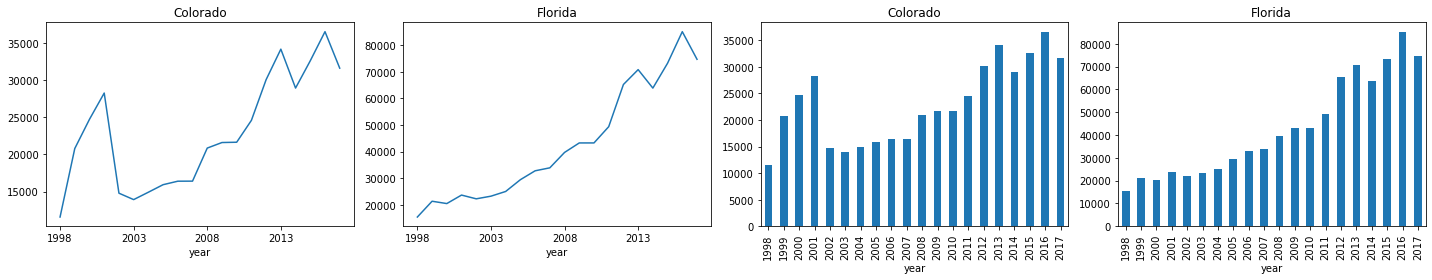

In [45]:
#Average amount of total guns in Colorado and Florida
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.total_guns['Colorado'].plot(kind='line', ax=ax1, title='Colorado')
df_state_year.total_guns['Florida'].plot(kind='line', ax=ax2, title='Florida')
df_state_year.total_guns['Colorado'].plot(kind='bar', ax=ax3, title='Colorado')
df_state_year.total_guns['Florida'].plot(kind='bar', ax=ax4, title='Florida')



plt.tight_layout()  

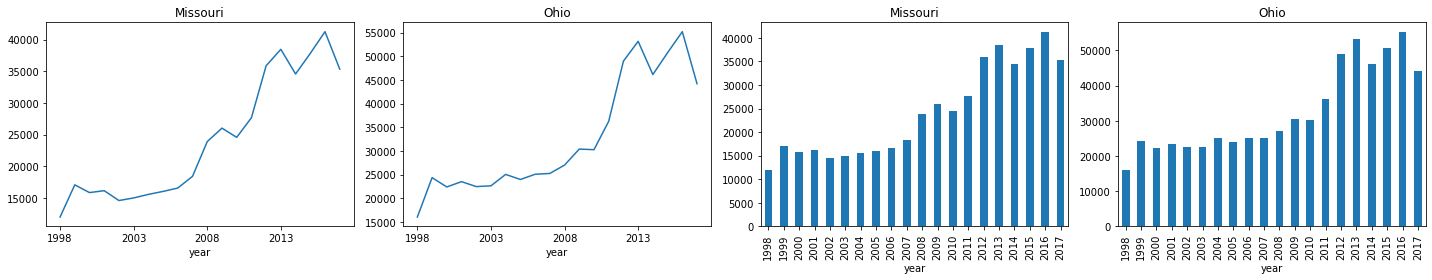

In [46]:
#Average amount of total guns in Missouri and Ohio
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.total_guns['Missouri'].plot(kind='line', ax=ax1, title='Missouri')
df_state_year.total_guns['Ohio'].plot(kind='line', ax=ax2, title='Ohio')
df_state_year.total_guns['Missouri'].plot(kind='bar', ax=ax3, title='Missouri')
df_state_year.total_guns['Ohio'].plot(kind='bar', ax=ax4, title='Ohio')


plt.tight_layout()  

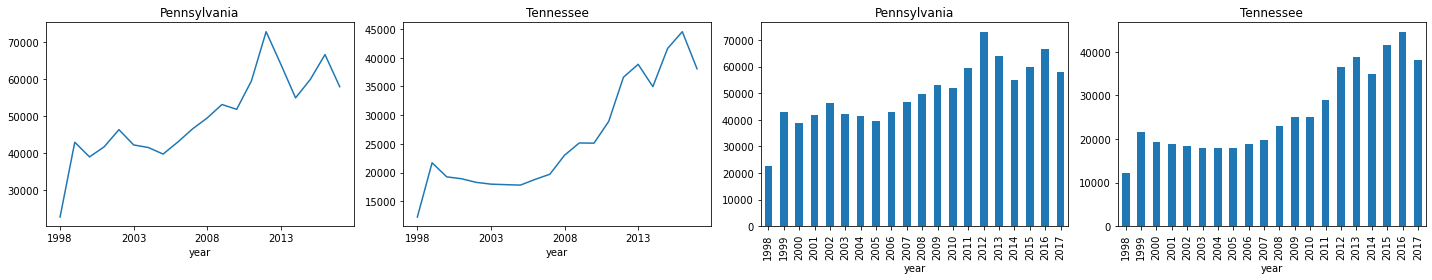

In [47]:
#Average amount of total guns in Pennsylvania adn Tennessee
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.total_guns['Pennsylvania'].plot(kind='line', ax=ax1, title='Pennsylvania')
df_state_year.total_guns['Tennessee'].plot(kind='line', ax=ax2, title='Tennessee')
df_state_year.total_guns['Pennsylvania'].plot(kind='bar', ax=ax3, title='Pennsylvania')
df_state_year.total_guns['Tennessee'].plot(kind='bar', ax=ax4, title='Tennessee')




plt.tight_layout()  

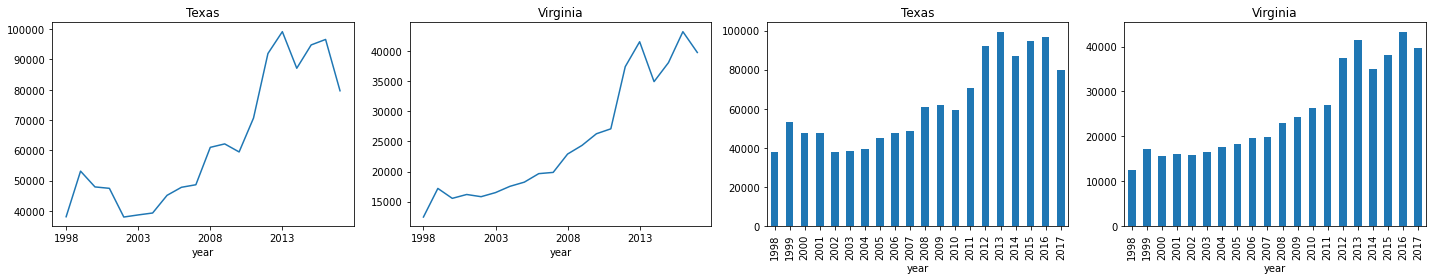

In [48]:
#Average amount of total guns in Texas and Virginia
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))  # 1 row, 4 columns
df_state_year.total_guns['Texas'].plot(kind='line', ax=ax1, title='Texas')
df_state_year.total_guns['Virginia'].plot(kind='line', ax=ax2, title='Virginia')
df_state_year.total_guns['Texas'].plot(kind='bar', ax=ax3, title='Texas')
df_state_year.total_guns['Virginia'].plot(kind='bar', ax=ax4, title='Virginia')



plt.tight_layout()  

# Observation of top 10 states average total guns amount per year
    1. All the top 10 states share a similar shape to the national average amount graph
    2. Florida has a more steady increase in number of total guns.
    3. Pennsylvania graphs show a clear divide in years where long guns were purchased more then hand guns and vice versa, but the total amount was enough to be in the top ten
    4. in 2014 every state had a noticable decrease in average gun total amounts. 
    5. 2016 were the max gun amounts in every state except Texas and Pennsylvania
    6. Every state had a noticable increase in average total gun amounts from 2011 to 2012

In [49]:
df_gun

,month,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_guns
0,09,2017,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,12275.0
1,09,2017,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,5469.0
2,09,2017,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,19929.0
3,09,2017,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,10575.0
4,09,2017,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,64730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,11,1998,Virginia,0.0,0.0,14.0,2.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,16.0
12481,11,1998,Washington,1.0,0.0,65.0,286.0,0.0,8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361,351.0
12482,11,1998,West Virginia,3.0,0.0,149.0,251.0,0.0,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408,400.0
12483,11,1998,Wisconsin,0.0,0.0,25.0,214.0,0.0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241,239.0


# In 2016 how did each state compare to the national average in Handgun, Long Gun, and Total Gun amounts?
Explore year 2016
Year 2016 seems to be the year with the highest amount of guns

In [50]:
#create a data set for 2016
df_16 = df_gun[df_gun['year'] == '2016']
df_16

,month,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_guns
495,12,2016,Alabama,26996.0,0.0,13733.0,17519.0,376.0,533,0.0,...,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,62014,31628.0
496,12,2016,Alaska,254.0,0.0,4087.0,3698.0,243.0,191,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8786,8028.0
497,12,2016,Arizona,8900.0,121.0,18024.0,13785.0,1180.0,703,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,44887,32989.0
498,12,2016,Arkansas,3294.0,692.0,9192.0,13433.0,277.0,385,37.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,29926,22902.0
499,12,2016,California,61808.0,0.0,63649.0,93224.0,77929.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298161,234802.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,01,2016,Virginia,524.0,0.0,27033.0,15699.0,922.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44181,43654.0
1151,01,2016,Washington,19688.0,0.0,20427.0,11355.0,2147.0,595,4.0,...,0.0,0.0,555.0,458.0,29.0,5.0,11.0,0.0,58050,33929.0
1152,01,2016,West Virginia,3378.0,0.0,7419.0,5505.0,321.0,349,3.0,...,0.0,0.0,5.0,7.0,2.0,0.0,0.0,0.0,18985,13245.0
1153,01,2016,Wisconsin,9496.0,0.0,17969.0,10756.0,937.0,42,0.0,...,0.0,0.0,6.0,5.0,0.0,0.0,1.0,0.0,39561,29662.0


In [51]:
# 2016 statistics to get national mean amounts in handgun, long gun, and total guns
df_16.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_guns
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,...,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,16870.683333,786.765152,12250.754545,9073.501515,888.086364,390.489394,5.100000,3.974242,3.889394,0.243939,...,0.024242,0.031818,22.062121,16.730303,1.572727,0.548485,0.630303,0.107576,41553.806061,22212.342424
std,43962.328099,7260.119097,14333.189656,9923.793158,3567.484454,549.652997,21.661186,7.246847,6.206478,0.625369,...,0.290497,0.331300,85.235000,67.566928,5.555829,1.624662,1.722736,0.436155,57826.709125,25187.491443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,774.250000,0.000000,2441.750000,2971.500000,97.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8830.500000,6095.250000
50%,3604.000000,0.000000,7034.500000,5931.000000,284.500000,200.500000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22212.500000,13649.500000
75%,15769.250000,0.000000,16485.750000,12759.500000,883.000000,529.000000,0.250000,5.250000,6.000000,0.000000,...,0.000000,0.000000,7.000000,7.000000,1.000000,0.000000,0.000000,0.000000,48175.750000,30237.000000
max,358510.000000,98970.000000,72626.000000,93224.000000,77929.000000,3891.000000,205.000000,53.000000,44.000000,4.000000,...,6.000000,6.000000,672.000000,585.000000,59.000000,21.000000,15.000000,4.000000,397059.000000,234802.000000


# Group data by State

In [52]:
#create a new data set based of year 2016 data set by grouping the states by mean.
df_state_16 = df_16.groupby(['state']).mean()

In [53]:
df_state_16

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_guns
state,,,,,,,,,,,,,,,,,,,,,
Alabama,24253.250000,0.000000,12760.250000,10163.583333,508.666667,545.416667,0.416667,9.250000,9.500000,0.166667,...,0.000000,0.000000,6.000000,5.416667,0.333333,0.250000,0.166667,0.000000,51412.250000,23432.500000
Alaska,260.083333,0.000000,3124.250000,3073.916667,240.750000,193.000000,0.000000,7.000000,5.833333,0.000000,...,0.000000,0.000000,3.250000,5.500000,0.083333,0.166667,0.250000,0.000000,7303.916667,6438.916667
Arizona,7314.250000,425.750000,13898.666667,9082.333333,1093.500000,659.000000,0.000000,6.166667,5.000000,0.250000,...,0.000000,0.000000,6.333333,4.666667,0.916667,0.916667,0.916667,0.083333,34689.916667,24074.500000
Arkansas,4621.333333,586.333333,6687.000000,6843.333333,254.916667,366.666667,11.916667,6.416667,9.666667,0.250000,...,0.000000,0.000000,6.000000,5.333333,0.500000,0.583333,0.333333,0.083333,22167.833333,13785.250000
California,86415.083333,0.000000,46696.250000,46212.500000,17642.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,198097.250000,110551.000000
Colorado,7090.583333,0.000000,20208.500000,15002.166667,1324.166667,1191.083333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45042.833333,36534.833333
Connecticut,12412.416667,0.000000,10197.916667,3651.083333,203.750000,0.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,26474.333333,14052.750000
Delaware,703.333333,0.000000,2131.166667,1812.166667,105.666667,86.166667,0.000000,1.833333,2.500000,0.000000,...,0.000000,0.000000,49.166667,16.250000,2.666667,1.000000,0.250000,0.000000,4952.500000,4049.000000
District of Columbia,12.000000,0.000000,56.250000,4.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.916667,60.250000


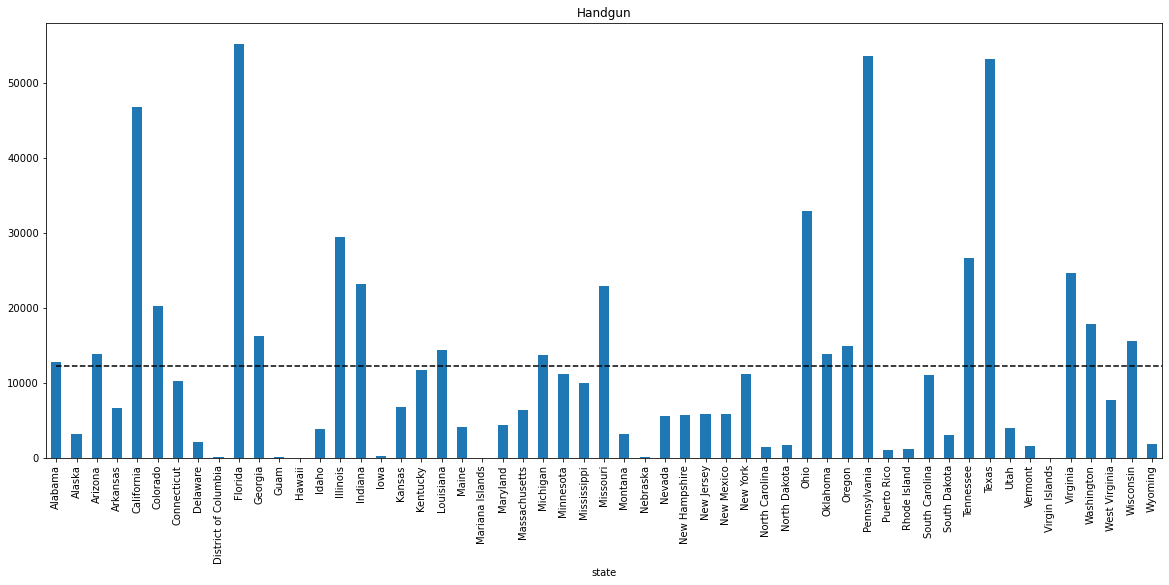

In [54]:
#Handgun average amounts per state/territories

#creating the mean line
mean_line = df_16.describe()['handgun']['mean']

#handgun bar graph
fig, ax=plt.subplots()
df_state_16.handgun.plot(kind='bar', ax=ax, figsize=(20,8), title='Handgun')

#plot bar graph with mean line
ax.plot([0., 75], [mean_line, mean_line], "k--")

In [55]:
#find states above average
for state in df_state_16.index:
    #print(df_state_16.handgun[state])
    if df_state_16.handgun[state] > mean_line:
        print(state)

Alabama
Arizona
California
Colorado
Florida
Georgia
Illinois
Indiana
Louisiana
Michigan
Missouri
Ohio
Oklahoma
Oregon
Pennsylvania
Tennessee
Texas
Virginia
Washington
Wisconsin


# Observations: Handgun average amounts per state/territories
    1. The average amount of hand guns in 2016 was 12250.75. 20 states/territories were above average.
    2. Above average states: Alabama, Arizona, California, Colorado, Florida, Georgia, Illinois, Indiana, Louisiana, Michigan, Missouri, Ohio, Oklahoma, Oregon, Pennsylvania, Tennessee, Texas, Virginia, Washington, and Wisconsin.
    3. Florida has the most average handgun amounts in 2016

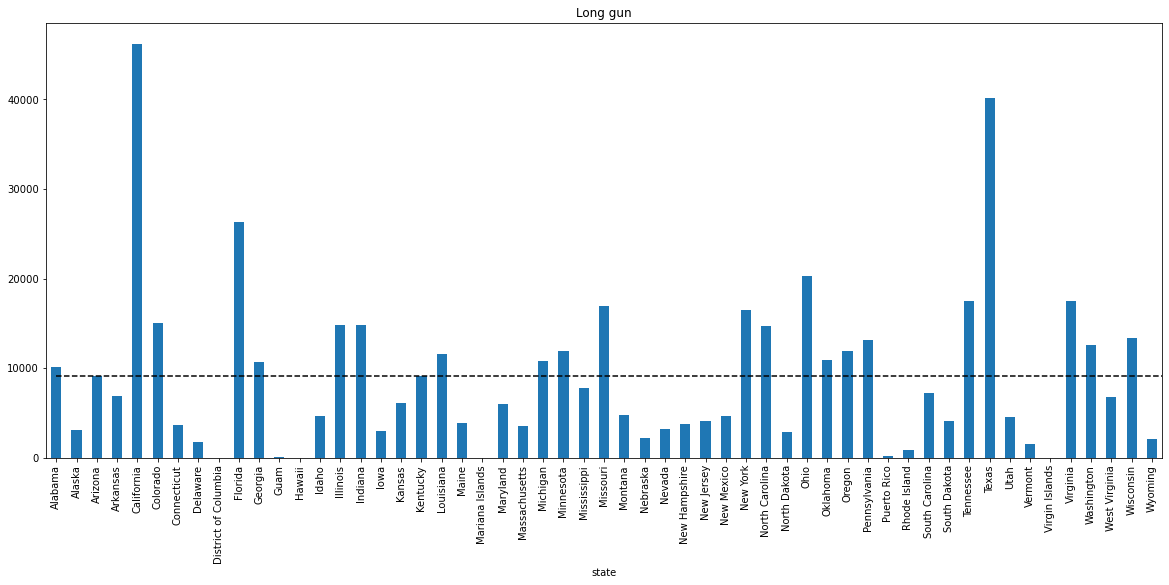

In [56]:
#Long gun average amounts per state/territories

#creating mean line
mean_line = df_16.describe()['long_gun']['mean']

#long gun bar graph
fig, ax=plt.subplots()
df_state_16.long_gun.plot(kind='bar', ax=ax, figsize=(20,8), title='Long gun')

#plot bar graph with mean line
ax.plot([0., 75], [mean_line, mean_line], "k--")

In [57]:
#find states above average
for state in df_state_16.index:
    #print(df_state_16.long_gun[state])
    if df_state_16.long_gun[state] > mean_line:
        print(state)

Alabama
Arizona
California
Colorado
Florida
Georgia
Illinois
Indiana
Kentucky
Louisiana
Michigan
Minnesota
Missouri
New York
North Carolina
Ohio
Oklahoma
Oregon
Pennsylvania
Tennessee
Texas
Virginia
Washington
Wisconsin


# Observations: Long gun average amounts per state/territories
    1. The average amount of long guns in 2016 was 9073.50. 24 states/territories were above average.
    2. Above average states: Alabama, Arizona, California, Colorado, Florida, Georgia, Illinois, Indiana, Kentucky, Louisiana, Michigan, Minnesota, Missouri, New York, North Carolina, Ohio, Oklahoma, Oregon, Pennsylvania, Tennessee, Texas, Virginia, Washington, and Wisconsin
    3. California had the most long gun amounts in 2016

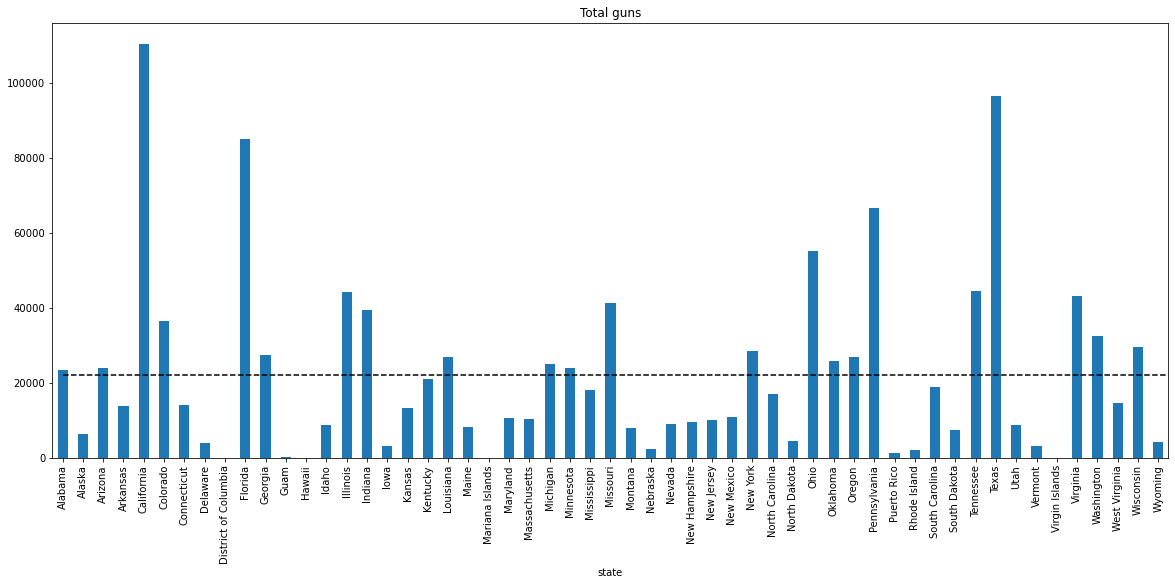

In [58]:
#Total gun average amounts per state/territories

#creating the mean line
mean_line = df_16.describe()['total_guns']['mean']

#total gun bar graph
fig, ax=plt.subplots()
df_state_16.total_guns.plot(kind='bar', ax=ax, figsize=(20,8), title='Total guns')

#plot bar graph with mean line
ax.plot([0., 75], [mean_line, mean_line], "k--")

In [59]:
#find states above average
for state in df_state_16.index:
    #print(df_state_16.total_guns[state])
    if df_state_16.total_guns[state] > mean_line:
        print(state)

Alabama
Arizona
California
Colorado
Florida
Georgia
Illinois
Indiana
Louisiana
Michigan
Minnesota
Missouri
New York
Ohio
Oklahoma
Oregon
Pennsylvania
Tennessee
Texas
Virginia
Washington
Wisconsin


# Observations: Total gun average amounts per state/territories
    1. The average total gun amount in 2016 was 22212.34. 22 states/territories were above average
    2. Above average states: Alabama, Arizona, California, Colorado, Florida, Georgia, Illinois, Indiana, Louisiana, Michigan, Minnesota, Missouri, New York, Ohio, Oklahoma, Oregon, Pennsylvania, Tennessee, Texas, Virginia, Washington and Wisconsin
    3. California had the most total gun amounts in 2016


# Observations of Average gun amounts in 2016 by State.
    1. The average amount of hand guns in 2016 was 12250.75. 20 states/territories were above average.
    2. The average amount of long guns in 2016 was 9073.50. 24 states/territories were above average.
    3. The average total gun amount in 2016 was 22212.34. 22 states/territories were above average
    4. The top ten states were above average in all three categories. 
    5. California has the most long guns and total guns in 2016. Florida lead with hand guns.
    6. Kentucky and North Carolina were above average in long guns but below average in hand gun and total guns.
    7. New York and Minnesota were above average in both long guns and total guns but below average in hand guns.

# Conclusions

Results:

    1. The amount of hand guns grew rapidly and eventually passed the amount of long guns in 2014.
    2. The average amount of total guns increased over the years with the increase of handgun numbers rapidly leading to the overall increase.
    3. Texas, California, Pennsylvania, Florida, Ohio, Tennessee, Virginia, Missouri, Colorado, and Alabama were the top ten states with the most guns over 20 years.
    4. Every top ten state has a similar shaped handgun bar and line graph except Pennsylvania. An increase from 1998 to 1999 before a slight decline then an increase in numbers reaching peak in either 2015 or 2016
    5. Pennsylvania's handgun numbers from 1999 to 2013 were very low before a dramatic increase in 2014.
    6. Top 10 States and National average handgun graph shapes are nearly identical
    7. Pennsylvania's long gun numbers decreased drastically when Pennsylvania's hand gun numbers increased drastically in 2014 to 2017
    8. There isn't a common shape in the long gun graphs for all the top ten states.
    9. All the top 10 states share a similar total gun shape to the national average amount graph
    10. Pennsylvania's graphs show a clear divide in years where long guns were purchased more then hand guns and vice versa, but the total amount was enough to be in the top ten.
    11. in 2014 every state had a noticable decrease in average gun total amounts. 
    12. 2016 were the max gun amounts in every state except Texas and Pennsylvania
    13. Every state had a noticable increase in average total gun amounts from 2011 to 2012
    14. The average amount of hand guns in 2016 was 12250.75. 20 states/territories were above average.
    15. The average amount of long guns in 2016 was 9073.50. 24 states/territories were above average.
    16. The average total gun amount in 2016 was 22212.34. 22 states/territories were above average
    
Limitations:

    1. Data from 1998 and 2017 weren't a full years worth of data, so the downward trends in 2017 aren't fully accurate.
    2. Relaxed gun laws in the early years may of caused gun type numbers to be inaccurate.
    3. No details about the admin column causes difficulty in drawling a conclusion.
    4. Its is difficult to determine what the total column number means.

Mean Line reference: https://stackoverflow.com/questions/28129606/how-to-create-a-matplotlib-bar-chart-with-a-threshold-line